In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn

In [2]:
raw_data = pd.read_excel("Real estate valuation data set.xlsx")
raw_data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [4]:
data = raw_data.copy()

# exploring PDFs

Text(0.5, 0, 'X6 longitude')

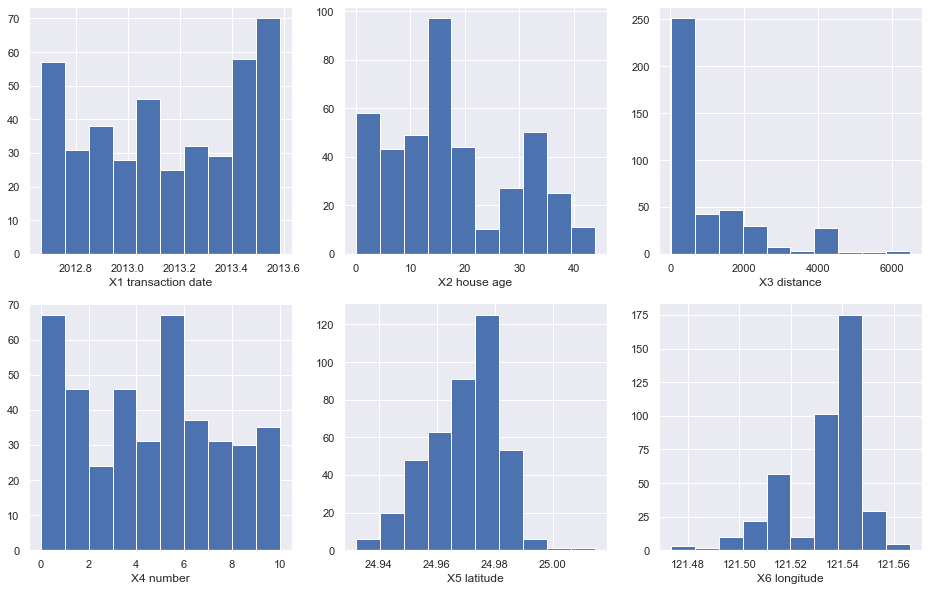

In [5]:
fig , ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(16,10))
ax1.hist(data["X1 transaction date"])
ax1.set_xlabel("X1 transaction date")

ax2.hist(data["X2 house age"])
ax2.set_xlabel("X2 house age")

ax3.hist(data["X3 distance to the nearest MRT station"] )
ax3.set_xlabel("X3 distance")

ax4.hist(data["X4 number of convenience stores"])
ax4.set_xlabel("X4 number")

ax5.hist(data["X5 latitude"])
ax5.set_xlabel("X5 latitude")

ax6.hist(data["X6 longitude"])
ax6.set_xlabel("X6 longitude")


(array([ 28.,  95., 111., 115.,  52.,   9.,   3.,   0.,   0.,   1.]),
 array([  7.6 ,  18.59,  29.58,  40.57,  51.56,  62.55,  73.54,  84.53,
         95.52, 106.51, 117.5 ]),
 <BarContainer object of 10 artists>)

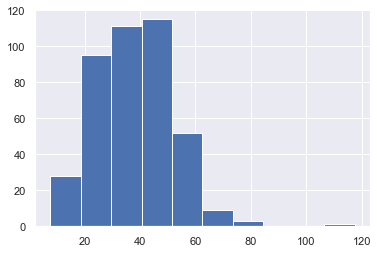

In [6]:
plt.hist(data["Y house price of unit area"])

# Dealing with outliers

(array([ 13.,  33.,  68.,  59., 102.,  66.,  44.,  21.,   4.,   3.]),
 array([ 7.6 , 14.67, 21.74, 28.81, 35.88, 42.95, 50.02, 57.09, 64.16,
        71.23, 78.3 ]),
 <BarContainer object of 10 artists>)

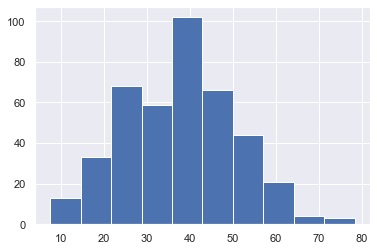

In [7]:
data_1= data[data["Y house price of unit area"]< 100]
data_1["Y house price of unit area"]

plt.hist(data_1["Y house price of unit area"] )

(array([174.,  90.,  26.,  30.,  20.,  27.,   5.,   4.,   1.,  11.]),
 array([  23.38284 ,  428.986356,  834.589872, 1240.193388, 1645.796904,
        2051.40042 , 2457.003936, 2862.607452, 3268.210968, 3673.814484,
        4079.418   ]),
 <BarContainer object of 10 artists>)

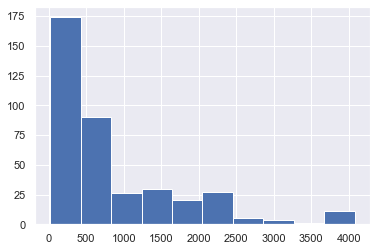

In [8]:
q = data_1["X3 distance to the nearest MRT station"].quantile(0.95)
data_2= data_1[data_1["X3 distance to the nearest MRT station"]< q]
data_2["X3 distance to the nearest MRT station"]

plt.hist(data_2["X3 distance to the nearest MRT station"] )

(array([  3.,   8.,  40.,  61.,  91., 124.,  53.,   6.,   1.,   1.]),
 array([24.93207 , 24.940322, 24.948574, 24.956826, 24.965078, 24.97333 ,
        24.981582, 24.989834, 24.998086, 25.006338, 25.01459 ]),
 <BarContainer object of 10 artists>)

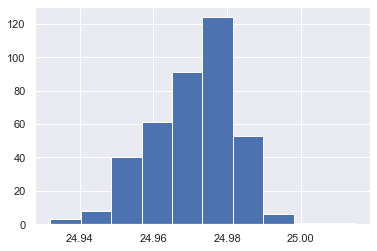

In [9]:
plt.hist(data_2["X5 latitude"]  )

(array([ 10.,  34.,  26.,   9.,  38., 106., 121.,  36.,   5.,   3.]),
 array([121.50243 , 121.508814, 121.515198, 121.521582, 121.527966,
        121.53435 , 121.540734, 121.547118, 121.553502, 121.559886,
        121.56627 ]),
 <BarContainer object of 10 artists>)

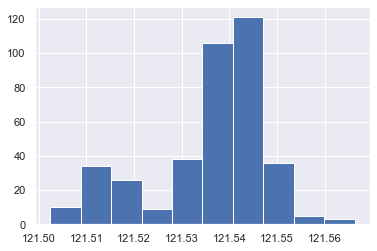

In [10]:
plt.hist(data_2["X6 longitude"])

In [11]:
data_2 = data_2.reset_index(drop=True)

In [12]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     388 non-null    float64
 1   X2 house age                            388 non-null    float64
 2   X3 distance to the nearest MRT station  388 non-null    float64
 3   X4 number of convenience stores         388 non-null    int64  
 4   X5 latitude                             388 non-null    float64
 5   X6 longitude                            388 non-null    float64
 6   Y house price of unit area              388 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 21.3 KB


In [13]:
from sklearn.feature_selection import f_regression
f_regression(data_2[["X1 transaction date","X2 house age", "X3 distance to the nearest MRT station" ,"X4 number of convenience stores"
                    ,"X5 latitude", "X6 longitude"]] ,data_2["Y house price of unit area"])



f_regression(data_2[["X1 transaction date","X2 house age", "X3 distance to the nearest MRT station" ,"X4 number of convenience stores"
                    ,"X5 latitude", "X6 longitude"]] ,data_2["Y house price of unit area"])[1].round(10)

array([7.43730357e-02, 7.26714000e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [14]:
data_2 = data_1.drop("X1 transaction date" , axis = 1)

# OLS Assumptions

Text(0.5, 0, 'X6 longitude')

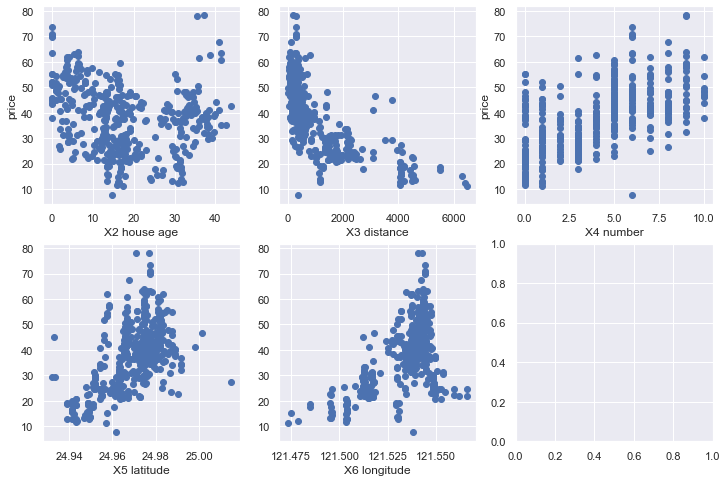

In [15]:
fig , ((ax2, ax3 ,ax4) , (ax5, ax6 , ax7)) = plt.subplots(2,3, figsize=(12,8))


ax2.scatter(data_2["X2 house age"] , data_2["Y house price of unit area"])
ax2.set_xlabel("X2 house age")
ax2.set_ylabel("price")

ax3.scatter(data_2["X3 distance to the nearest MRT station"] , data_2["Y house price of unit area"])
ax3.set_xlabel("X3 distance")

ax4.scatter(data_2["X4 number of convenience stores"] , data_2["Y house price of unit area"])
ax4.set_xlabel("X4 number")
ax4.set_ylabel("price")

ax5.scatter(data_2["X5 latitude"] , data_2["Y house price of unit area"])
ax5.set_xlabel("X5 latitude")

ax6.scatter(data_2["X6 longitude"] , data_2["Y house price of unit area"])
ax6.set_xlabel("X6 longitude")




In [16]:

data_2["Y house price of unit area"] = np.log(data_2["Y house price of unit area"])


Text(0.5, 0, 'X6 longitude')

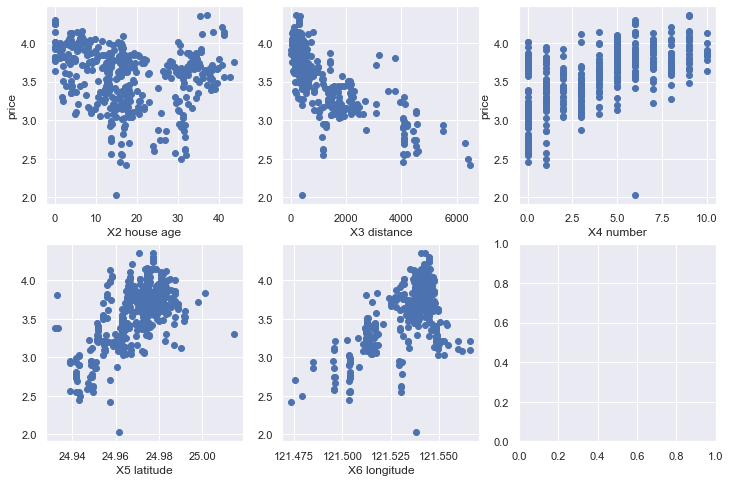

In [17]:
fig , ((ax2, ax3 ,ax4) , (ax5, ax6 , ax7)) = plt.subplots(2,3, figsize=(12,8))


ax2.scatter(data_2["X2 house age"] , data_2["Y house price of unit area"])
ax2.set_xlabel("X2 house age")
ax2.set_ylabel("price")

ax3.scatter(data_2["X3 distance to the nearest MRT station"] , data_2["Y house price of unit area"])
ax3.set_xlabel("X3 distance")

ax4.scatter(data_2["X4 number of convenience stores"] , data_2["Y house price of unit area"])
ax4.set_xlabel("X4 number")
ax4.set_ylabel("price")

ax5.scatter(data_2["X5 latitude"] , data_2["Y house price of unit area"])
ax5.set_xlabel("X5 latitude")

ax6.scatter(data_2["X6 longitude"] , data_2["Y house price of unit area"])
ax6.set_xlabel("X6 longitude")



In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_2[["X2 house age", "X3 distance to the nearest MRT station" ,"X4 number of convenience stores"
                    ,"X5 latitude", "X6 longitude"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

vif

,VIF,features
0,3.470633e+00,X2 house age
1,2.984208e+00,X3 distance to the nearest MRT station
2,4.771002e+00,X4 number of convenience stores
3,5.904244e+06,X5 latitude
4,5.903920e+06,X6 longitude


In [19]:
data_3 = data_2.drop(["X6 longitude"] , axis =1)
data_3.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,3.634951
1,19.5,306.59470,9,24.98034,3.742420
2,13.3,561.98450,5,24.98746,3.856510
3,13.3,561.98450,5,24.98746,4.003690
4,5.0,390.56840,5,24.97937,3.763523


# linear regression model

In [20]:
x = data_3[["X2 house age", "X3 distance to the nearest MRT station" ,"X4 number of convenience stores", "X5 latitude"]]
y = data_3["Y house price of unit area"]

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
   
import statsmodels.api as sm

x = sm.add_constant(x_scaled)
y = data_3["Y house price of unit area"]
model = sm.OLS(y, x).fit()

#view model summary

model.summary()
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.688
Model:                                    OLS   Adj. R-squared:                  0.684
Method:                         Least Squares   F-statistic:                     224.4
Date:                        Fri, 27 Jan 2023   Prob (F-statistic):          1.22e-101
Time:                                17:44:22   Log-Likelihood:                 45.210
No. Observations:                         413   AIC:                            -80.42
Df Residuals:                             408   BIC:                            -60.30
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5638      0.011    331.910      0.000       3.543       3.585
x1            -0.0780      0.011     -7.218      0.000      -0.099      -0.057
x2            -0.1780      0.015    -11.727      0.000      -0.208      -0.148
x3             0.0896      0.014      6.564      0.000       0.063       0.116
x4             0.1005      0.013      7.456      0.000       0.074       0.127
==============================================================================
Omnibus:                      106.385   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1465.380
Skew:                          -0.662   Prob(JB):                         0.00
Kurtosis:                      12.132   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled , y, test_size = 0.3 , random_state = 365)

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.6048505910628909

# Other ML Models

In [25]:
from sklearn.svm import SVR

reg_s = SVR()
reg_s.fit(x_train, y_train)
reg_s.score(x_test, y_test)

0.7683978864767167

In [26]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
reg_rf.score(x_test, y_test)

0.7191643231308149

In [27]:
from sklearn.ensemble import AdaBoostRegressor
reg_ab = AdaBoostRegressor()
reg_ab.fit(x_train, y_train)
reg_ab.score(x_test, y_test)

0.6161318587309013

In [28]:
from sklearn.neighbors import KNeighborsRegressor
reg_kn = KNeighborsRegressor()
reg_kn.fit(x_train, y_train)
reg_kn.score(x_test, y_test)

0.597790602255863

In [29]:
from sklearn.tree import DecisionTreeRegressor
reg_dt = DecisionTreeRegressor()
reg_dt.fit(x_train, y_train)
reg_dt.score(x_test, y_test)

0.4577064091675648